In [2]:
!pip uninstall -y pandas scipy numpy matplotlib seaborn dash-cytoscape plotnine thinc tsfresh mizani omegaconf antlr4-python3-runtime
!pip install pandas==1.3.5 scipy==1.7.3 numpy==1.21.6 matplotlib==3.5.3 seaborn==0.11.2
!pip install pycaret[full] -q

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: matplotlib 3.10.0
Uninstalling matplotlib-3.10.0:
  Successfully uninstalled matplotlib-3.10.0
Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Found existing installation: plotnine 0.14.5
Uninstalling plotnine-0.14.5:
  Successfully uninstalled plotnine-0.14.5
Found existing installation: thinc 8.3.6
Uninstalling thinc-8.3.6:
  Successfully uninstalled thinc-8.3.6
Found existing installation: tsfresh 0.21.0
Uninstalling tsfresh-0.21.0:
  Successfully uninstalled tsfresh-0.21.0
Found existing installation: mizani 0.13.5
Uninstalling mizani-0.13.5:
  Successfully uninstalled 

In [ ]:
import os
import sys

os.kill(os.getpid(), 9)

In [1]:
import numpy as np
import pandas as pd
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *

In [2]:
import kagglehub

path = kagglehub.dataset_download("csafrit2/maternal-health-risk-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/maternal-health-risk-data


In [3]:
df = pd.read_csv("/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv")
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


#Data Preprocessing

In [4]:
#Remove duplicates
df.drop_duplicates(inplace=True)
print(f"After removing duplicates: {df.shape[0]} rows")

After removing duplicates: 452 rows


In [5]:
#Remove outliers
physio_bounds = {
    'Age':         (15,   49),
    'SystolicBP':  (70,  200),
    'DiastolicBP': (50,  120),
    'BS':          (2.8, 15.0),
    'BodyTemp':    (95.0,104.0),
    'HeartRate':   (40,  150)
}

for col, (lo, hi) in physio_bounds.items():
    df = df[(df[col] >= lo) & (df[col] <= hi)]

print("After domain filter rows:", df.shape[0])

After domain filter rows: 336


In [6]:
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


#AutoML - PyCaret

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

In [7]:
clf_init = setup(df,
          target = 'RiskLevel',
          session_id = 42)

,Description,Value
0,Session id,42
1,Target,RiskLevel
2,Target type,Multiclass
3,Target mapping,"high risk: 0, low risk: 1, mid risk: 2"
4,Original data shape,"(336, 7)"
5,Transformed data shape,"(336, 7)"
6,Transformed train set shape,"(235, 7)"
7,Transformed test set shape,"(101, 7)"
8,Numeric features,6
9,Preprocess,True


In [8]:
clf = setup(df,
          target = 'RiskLevel',
          session_id = 42,
          fix_imbalance=True,
          normalize=True,
          polynomial_features=True)

,Description,Value
0,Session id,42
1,Target,RiskLevel
2,Target type,Multiclass
3,Target mapping,"high risk: 0, low risk: 1, mid risk: 2"
4,Original data shape,"(336, 7)"
5,Transformed data shape,"(476, 28)"
6,Transformed train set shape,"(375, 28)"
7,Transformed test set shape,"(101, 28)"
8,Numeric features,6
9,Preprocess,True


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
best_models = compare_models(exclude=['lightgbm','catboost'], n_select=10, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6984,0.0000,0.6984,0.7133,0.6975,0.5016,0.5091,0.0110
ridge,Ridge Classifier,0.6853,0.0000,0.6853,0.6889,0.6793,0.4749,0.4813,0.0100
lr,Logistic Regression,0.6772,0.0000,0.6772,0.6979,0.6787,0.4672,0.4734,0.5090
qda,Quadratic Discriminant Analysis,0.7022,0.0000,0.7022,0.6814,0.6644,0.4829,0.5069,0.0120
nb,Naive Bayes,0.6516,0.7942,0.6516,0.7063,0.6617,0.4455,0.4578,0.0120
rf,Random Forest Classifier,0.6507,0.7572,0.6507,0.6702,0.6505,0.4172,0.4241,0.0500
et,Extra Trees Classifier,0.6426,0.7031,0.6426,0.6564,0.6411,0.4085,0.4148,0.0410
gbc,Gradient Boosting Classifier,0.6386,0.0000,0.6386,0.6541,0.6373,0.3997,0.4063,0.1260
xgboost,Extreme Gradient Boosting,0.6259,0.7437,0.6259,0.6413,0.6246,0.3780,0.3836,0.1350
ada,Ada Boost Classifier,0.6089,0.0000,0.6089,0.6626,0.6171,0.3681,0.3791,0.0290


Processing:   0%|          | 0/70 [00:00<?, ?it/s]

#Tune Model

In [11]:
tuned_models = [tune_model(model) for model in best_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.0000,0.6250,0.6179,0.6198,0.4000,0.4011
1,0.7917,0.0000,0.7917,0.8146,0.7960,0.6774,0.6849
2,0.4583,0.0000,0.4583,0.5278,0.4879,0.1613,0.1644
3,0.7083,0.0000,0.7083,0.6903,0.6970,0.5159,0.5173
4,0.6250,0.0000,0.6250,0.6349,0.6287,0.3881,0.3893
5,0.5652,0.0000,0.5652,0.7163,0.6042,0.3275,0.3567
6,0.7391,0.0000,0.7391,0.8278,0.7583,0.5767,0.5988
7,0.6957,0.0000,0.6957,0.6957,0.6957,0.4806,0.4806
8,0.6957,0.0000,0.6957,0.7609,0.7022,0.5374,0.5634


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6345,0.6238,0.4386,0.4580
1,0.7083,0.0000,0.7083,0.7127,0.7086,0.5410,0.5425
2,0.6250,0.0000,0.6250,0.6013,0.6121,0.3898,0.3910
3,0.7083,0.0000,0.7083,0.6923,0.6989,0.5044,0.5061
4,0.6667,0.0000,0.6667,0.6667,0.6495,0.4234,0.4333
5,0.5652,0.0000,0.5652,0.6285,0.5886,0.2945,0.3011
6,0.6957,0.0000,0.6957,0.7340,0.7026,0.4669,0.4719
7,0.6957,0.0000,0.6957,0.6957,0.6957,0.4806,0.4806
8,0.8696,0.0000,0.8696,0.8733,0.8646,0.7781,0.7868


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6250,0.0000,0.6250,0.6179,0.6198,0.4000,0.4011
1,0.7083,0.0000,0.7083,0.7127,0.7086,0.5410,0.5425
2,0.5417,0.0000,0.5417,0.5660,0.5530,0.2787,0.2795
3,0.7083,0.0000,0.7083,0.7239,0.7110,0.5346,0.5394
4,0.6667,0.0000,0.6667,0.6694,0.6630,0.4199,0.4244
5,0.6087,0.0000,0.6087,0.7348,0.6432,0.3802,0.4032
6,0.6957,0.0000,0.6957,0.7340,0.7026,0.4669,0.4719
7,0.6957,0.0000,0.6957,0.6957,0.6957,0.4806,0.4806
8,0.7391,0.0000,0.7391,0.7826,0.7453,0.5965,0.6128


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6667,0.6667,0.4667,0.4667
1,0.7917,0.0000,0.7917,0.7917,0.7810,0.6667,0.6742
2,0.5833,0.0000,0.5833,0.5833,0.5833,0.3333,0.3333
3,0.7500,0.0000,0.7500,0.7500,0.7500,0.5838,0.5838
4,0.7083,0.0000,0.7083,0.7613,0.6874,0.4847,0.5076
5,0.6957,0.0000,0.6957,0.7295,0.7065,0.5061,0.5128
6,0.6957,0.0000,0.6957,0.6696,0.6777,0.4524,0.4580
7,0.7391,0.0000,0.7391,0.7072,0.7181,0.5306,0.5372
8,0.8261,0.0000,0.8261,0.8328,0.8263,0.7098,0.7123


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.7917,0.5833,0.6861,0.5877,0.3939,0.4274
1,0.6667,0.8472,0.6667,0.7389,0.6856,0.4921,0.5096
2,0.5417,0.7668,0.5417,0.6083,0.5613,0.3016,0.3124
3,0.7083,0.7675,0.7083,0.7083,0.7083,0.5145,0.5145
4,0.6250,0.8107,0.6250,0.6121,0.6126,0.3647,0.3681
5,0.5652,0.7126,0.5652,0.7289,0.5989,0.3114,0.3388
6,0.7391,0.8444,0.7391,0.7565,0.7345,0.5306,0.5392
7,0.5217,0.7145,0.5217,0.6546,0.5657,0.2602,0.2774
8,0.8261,0.9019,0.8261,0.8346,0.8283,0.7212,0.7235


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8200,0.7500,0.7060,0.7007,0.5789,0.6045
1,0.7500,0.8131,0.7500,0.7603,0.7535,0.6066,0.6083
2,0.7917,0.7807,0.7917,0.8333,0.7619,0.6429,0.6803
3,0.8333,0.8262,0.8333,0.8725,0.8028,0.6981,0.7430
4,0.7083,0.7444,0.7083,0.7057,0.6887,0.4831,0.4991
5,0.6957,0.8029,0.6957,0.7340,0.7026,0.4669,0.4719
6,0.7391,0.7638,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.7391,0.7763,0.7391,0.6984,0.6993,0.5175,0.5381
8,0.7391,0.8572,0.7391,0.7500,0.7191,0.5385,0.5680


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8160,0.7500,0.7060,0.7007,0.5789,0.6045
1,0.7917,0.8623,0.7917,0.8095,0.7978,0.6667,0.6685
2,0.7500,0.7795,0.7500,0.7417,0.7269,0.5789,0.5966
3,0.8750,0.8026,0.8750,0.8984,0.8606,0.7785,0.8043
4,0.7083,0.7949,0.7083,0.7057,0.6887,0.4831,0.4991
5,0.7391,0.7841,0.7391,0.7565,0.7345,0.5306,0.5392
6,0.7391,0.8430,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.6957,0.7527,0.6957,0.6404,0.6577,0.4371,0.4508
8,0.7826,0.8560,0.7826,0.7957,0.7749,0.6230,0.6400


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.0000,0.7500,0.8042,0.6931,0.5789,0.6171
1,0.7083,0.0000,0.7083,0.7386,0.7180,0.5410,0.5455
2,0.5833,0.0000,0.5833,0.6261,0.6011,0.3443,0.3471
3,0.7917,0.0000,0.7917,0.7736,0.7648,0.6396,0.6546
4,0.7083,0.0000,0.7083,0.7057,0.6961,0.4815,0.4942
5,0.7391,0.0000,0.7391,0.7391,0.7391,0.5548,0.5548
6,0.6957,0.0000,0.6957,0.6256,0.6371,0.4037,0.4468
7,0.6522,0.0000,0.6522,0.6174,0.6289,0.3741,0.3802
8,0.7391,0.0000,0.7391,0.7466,0.7369,0.5563,0.5624


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.7957,0.7083,0.6696,0.6614,0.5172,0.5371
1,0.7083,0.8067,0.7083,0.7611,0.7242,0.5484,0.5590
2,0.5833,0.7101,0.5833,0.5979,0.5896,0.3443,0.3452
3,0.7083,0.7836,0.7083,0.6577,0.6705,0.5073,0.5183
4,0.6250,0.7592,0.6250,0.5833,0.5940,0.3514,0.3596
5,0.7391,0.7845,0.7391,0.7391,0.7391,0.5548,0.5548
6,0.7391,0.8261,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.6957,0.7043,0.6957,0.6630,0.6603,0.4371,0.4545
8,0.7826,0.8596,0.7826,0.7957,0.7749,0.6230,0.6400


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.0000,0.7500,0.5672,0.6446,0.5636,0.6354
1,0.6667,0.0000,0.6667,0.5556,0.5939,0.4074,0.4628
2,0.7083,0.0000,0.7083,0.5417,0.6083,0.4815,0.5594
3,0.7500,0.0000,0.7500,0.8079,0.6924,0.5370,0.5972
4,0.7500,0.0000,0.7500,0.7514,0.7423,0.5663,0.5740
5,0.7826,0.0000,0.7826,0.7702,0.7746,0.6192,0.6215
6,0.6957,0.0000,0.6957,0.5848,0.6084,0.3661,0.4822
7,0.6522,0.0000,0.6522,0.4954,0.5559,0.2977,0.3593
8,0.6957,0.0000,0.6957,0.7289,0.6748,0.4486,0.4885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [12]:
automl()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=7, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.05, min_samples_leaf=4,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=230, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

#Ensemble Model

In [13]:
#Select the model with the best performance based on F1-Score
for model in tuned_models:
    if "ExtraTrees" in str(model):
        et_model = model
        break

tuned_et = tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.8160,0.7500,0.7060,0.7007,0.5789,0.6045
1,0.7917,0.8623,0.7917,0.8095,0.7978,0.6667,0.6685
2,0.7500,0.7795,0.7500,0.7417,0.7269,0.5789,0.5966
3,0.8750,0.8026,0.8750,0.8984,0.8606,0.7785,0.8043
4,0.7083,0.7949,0.7083,0.7057,0.6887,0.4831,0.4991
5,0.7391,0.7841,0.7391,0.7565,0.7345,0.5306,0.5392
6,0.7391,0.8430,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.6957,0.7527,0.6957,0.6404,0.6577,0.4371,0.4508
8,0.7826,0.8560,0.7826,0.7957,0.7749,0.6230,0.6400


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
bagging_et = ensemble_model(et_model, method='Bagging')
boosting_ef = ensemble_model(et_model, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7083,0.8056,0.7083,0.6696,0.6614,0.5172,0.5371
1,0.7917,0.8877,0.7917,0.8095,0.7978,0.6667,0.6685
2,0.5833,0.7795,0.5833,0.6208,0.5979,0.3548,0.3588
3,0.8750,0.8079,0.8750,0.8984,0.8606,0.7785,0.8043
4,0.7083,0.8018,0.7083,0.7057,0.6887,0.4831,0.4991
5,0.7391,0.7792,0.7391,0.7565,0.7345,0.5306,0.5392
6,0.7391,0.8348,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.6522,0.7618,0.6522,0.6594,0.6539,0.4065,0.4078
8,0.7826,0.8574,0.7826,0.7957,0.7749,0.6230,0.6400


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.0000,0.5833,0.6261,0.6011,0.3443,0.3471
1,0.7917,0.0000,0.7917,0.8095,0.7978,0.6667,0.6685
2,0.6250,0.0000,0.6250,0.6833,0.6455,0.4194,0.4274
3,0.6667,0.0000,0.6667,0.6960,0.6766,0.4667,0.4721
4,0.6667,0.0000,0.6667,0.6528,0.6536,0.4217,0.4275
5,0.6522,0.0000,0.6522,0.7523,0.6801,0.4356,0.4523
6,0.7391,0.0000,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.6957,0.0000,0.6957,0.6404,0.6577,0.4371,0.4508
8,0.8261,0.0000,0.8261,0.8328,0.8263,0.7098,0.7123


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

#Stack & Blend model

In [15]:
stacked_model = stack_models(tuned_models, method='auto')
blended_model = blend_models(tuned_models, method='auto')

evaluate_model(stacked_model)
evaluate_model(blended_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.0000,0.7500,0.7381,0.7265,0.5862,0.5992
1,0.7500,0.0000,0.7500,0.7841,0.7614,0.6066,0.6116
2,0.6250,0.0000,0.6250,0.6434,0.6331,0.4098,0.4110
3,0.7917,0.0000,0.7917,0.7819,0.7841,0.6542,0.6561
4,0.7500,0.0000,0.7500,0.7514,0.7423,0.5663,0.5740
5,0.6522,0.0000,0.6522,0.7523,0.6801,0.4356,0.4523
6,0.7391,0.0000,0.7391,0.7565,0.7345,0.5306,0.5392
7,0.7826,0.0000,0.7826,0.7652,0.7640,0.6088,0.6187
8,0.7391,0.0000,0.7391,0.7747,0.7506,0.5805,0.5859


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.0000,0.7500,0.8042,0.6931,0.5789,0.6171
1,0.7500,0.0000,0.7500,0.7841,0.7614,0.6066,0.6116
2,0.7083,0.0000,0.7083,0.6929,0.6992,0.5254,0.5270
3,0.7917,0.0000,0.7917,0.7736,0.7648,0.6396,0.6546
4,0.7083,0.0000,0.7083,0.7057,0.6887,0.4831,0.4991
5,0.6957,0.0000,0.6957,0.7246,0.7071,0.4806,0.4822
6,0.7391,0.0000,0.7391,0.7221,0.7072,0.5036,0.5337
7,0.7391,0.0000,0.7391,0.6984,0.6993,0.5175,0.5381
8,0.7826,0.0000,0.7826,0.7957,0.7749,0.6230,0.6400


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
final_model = finalize_model(stacked_model)
save_model(final_model, '/content/best_model_pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'SystolicBP', 'DiastolicBP',
                                              'BS', 'BodyTemp', 'HeartRate'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_e...
                                                                     n_estimators=10,
                                                                     random_state=42))],
                                  

#Interpret

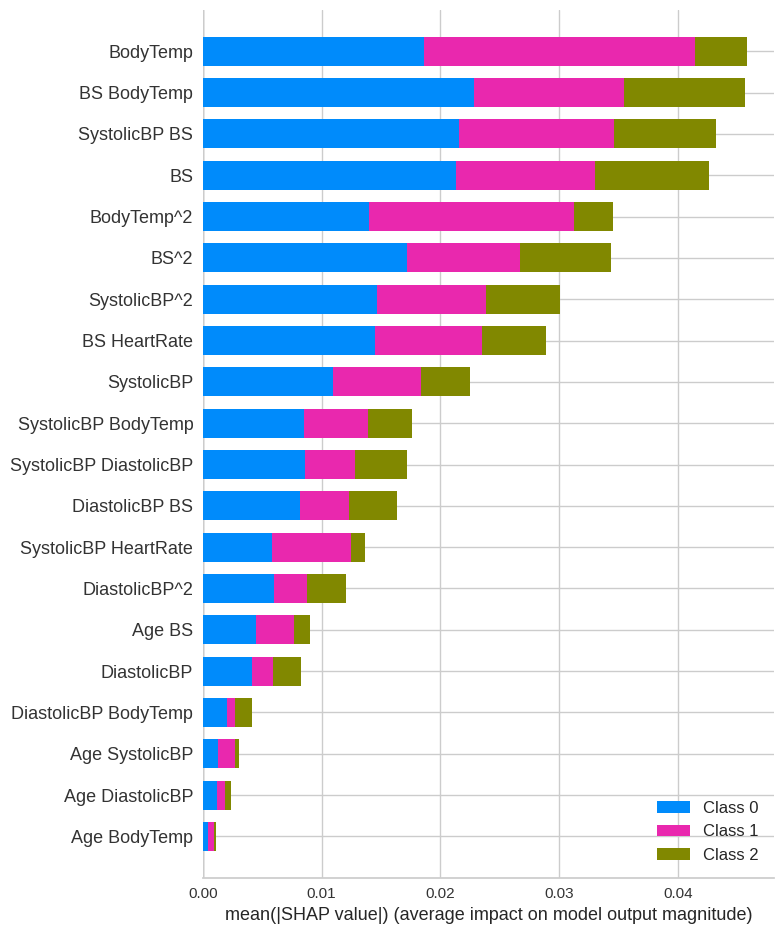

In [17]:
interpret_model(et_model, plot = 'summary')

In [18]:
interpret_model(et_model, plot = 'reason', observation = 1)

In [20]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

print(get_config('y_train').unique())
print(get_config('y_train_transformed').unique())

label_mapping = {'high risk': 0, 'low risk': 1, 'mid risk': 2}
df['RiskLevel_encoded'] = df['RiskLevel'].map(label_mapping)

explainer = ClassifierExplainer(et_model, df.drop(columns=['RiskLevel', 'RiskLevel_encoded']), df['RiskLevel_encoded'])
dashboard(et_model, display_format ='inline')


['high risk', 'low risk', 'mid risk']
Categories (3, object): ['high risk', 'low risk', 'mid risk']
[0 1 2]
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of ExtraTreesClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of ExtraTreesClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
!pip freeze > requirements.txt